<a href="https://colab.research.google.com/github/vivi1231/0807/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_yest))
(x_train, y_train), (x_test, y_test)= load_data()

In [40]:
# shape很重要
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


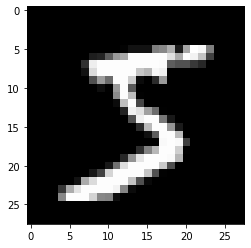

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [42]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [43]:
# 堆模型
# bias很重要，
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 +128(bias)      
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [44]:
# loss 與正確答案的距離
# gini 猜錯機率
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
      optimizer=Adam(),
      metrics=["accuracy"])

In [45]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [46]:
# 為何要除255? >正歸化
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint ,EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5,restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2表示不要進度條
# train loss 必下降 accuracy不值得參考  val_loss重要
model.fit(x_train_norm,
      y_train_cat,
      batch_size=200,
      validation_split=0.1,
      epochs=50,
      verbose=2,
      callbacks=[stop_callback, save_callback] )

Epoch 1/50
270/270 - 1s - loss: 0.4330 - accuracy: 0.8823 - val_loss: 0.1930 - val_accuracy: 0.9505
Epoch 2/50
270/270 - 1s - loss: 0.2002 - accuracy: 0.9433 - val_loss: 0.1388 - val_accuracy: 0.9645
Epoch 3/50
270/270 - 1s - loss: 0.1465 - accuracy: 0.9587 - val_loss: 0.1146 - val_accuracy: 0.9695
Epoch 4/50
270/270 - 1s - loss: 0.1163 - accuracy: 0.9674 - val_loss: 0.1028 - val_accuracy: 0.9717
Epoch 5/50
270/270 - 1s - loss: 0.0963 - accuracy: 0.9723 - val_loss: 0.0983 - val_accuracy: 0.9715
Epoch 6/50
270/270 - 1s - loss: 0.0811 - accuracy: 0.9771 - val_loss: 0.0901 - val_accuracy: 0.9720
Epoch 7/50
270/270 - 1s - loss: 0.0689 - accuracy: 0.9804 - val_loss: 0.0883 - val_accuracy: 0.9750
Epoch 8/50
270/270 - 1s - loss: 0.0597 - accuracy: 0.9831 - val_loss: 0.0851 - val_accuracy: 0.9752
Epoch 9/50
270/270 - 1s - loss: 0.0510 - accuracy: 0.9857 - val_loss: 0.0891 - val_accuracy: 0.9738
Epoch 10/50
270/270 - 1s - loss: 0.0450 - accuracy: 0.9878 - val_loss: 0.0768 - val_accuracy: 0.9788

In [53]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9784


[0.07285887002944946, 0.9783999919891357]

In [56]:
# model.save("mlp.h5")
# (HDFView 可找資料)
from tensorflow.keras.models import load_model
loaded = load_model("mnist.h5")
# 不需要:compile 可以: fit/evaluate/predict
loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9784


[0.07285887002944946, 0.9783999919891357]

In [57]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [59]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
             index=["{}(真實)".format(i) for i in range(10)],
             columns=["{}(預測)".format(i) for i in range(10)]
             )

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),971,0,1,0,0,1,2,1,3,1
1(真實),0,1123,4,0,0,1,2,1,4,0
2(真實),5,2,1004,2,2,0,4,5,7,1
3(真實),1,0,4,989,0,4,0,4,4,4
4(真實),1,0,1,1,962,0,9,3,0,5
5(真實),2,0,0,4,2,871,7,1,2,3
6(真實),6,2,0,1,3,4,940,1,1,0
7(真實),0,5,11,1,0,0,0,1004,2,5
8(真實),4,0,2,3,3,6,2,5,944,5
9(真實),4,4,0,6,6,3,2,7,1,976


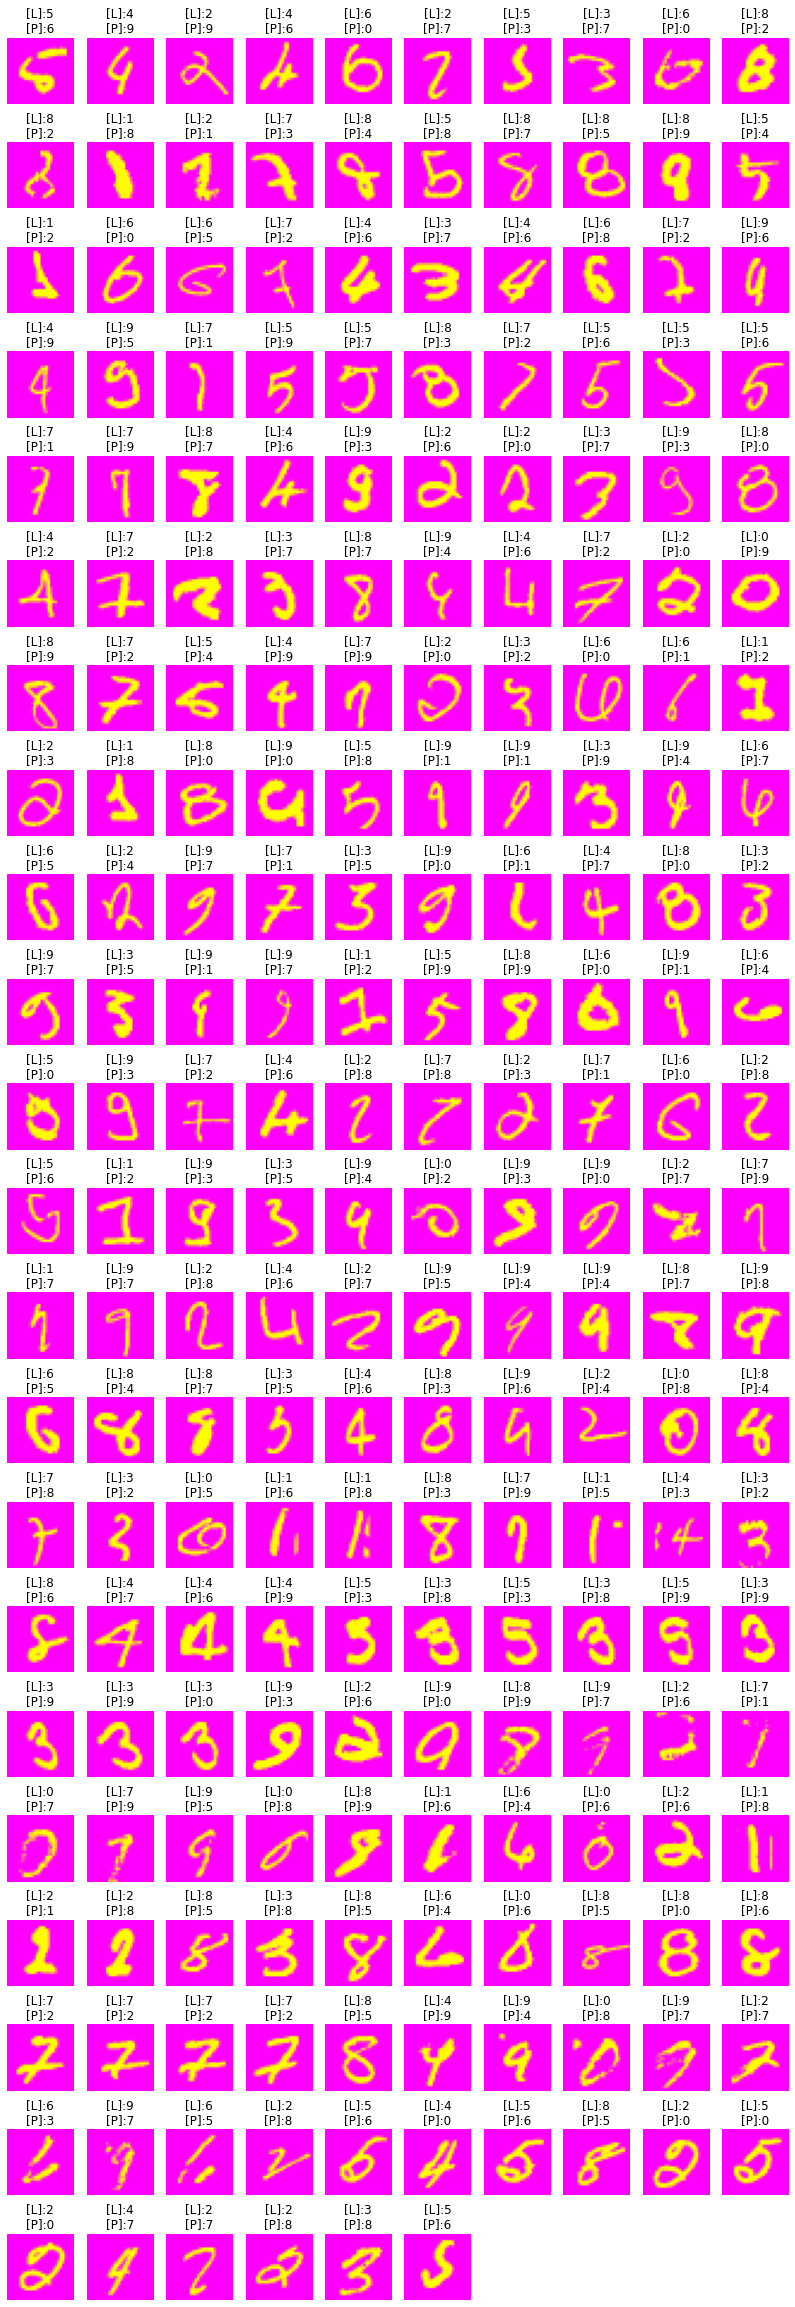

In [68]:
# 顯示後發現，以"形狀"辨識模型，所以要從這修正。
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,42)) #寬,高
idx = np.nonzero(pre!= y_test)[0]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="spring")



檔名:test.png
0 的機率: 0.0
1 的機率: 0.01
2 的機率: 0.0
3 的機率: 0.62
4 的機率: 0.0
5 的機率: 0.01
6 的機率: 0.0
7 的機率: 0.02
8 的機率: 0.32
9 的機率: 0.02


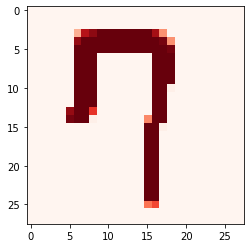

In [79]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(i, "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")